## Numerical Simulation Laboratory (NSL)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 4

Fourth lesson deals about Molecular Dynamic simulations.
We simulated the dynamic of system of $N$ particles in a box with PBC in NVE ensemble, interacting with a Lennard-Jones potential (classic Lennard-Jones fluid).

The goals of this lesson were:
- improve the MD code provided by enabling the possibility to re-start the simulation reading from two spatial configuration files and rescaling velocities in order to match a desired temperature.
- implement the calculation of the average values and the uncertainties for energies $E/N$, $U/N$, $K/N$, temperature $T$ and pressure $P$ (using virial theorem) exploiting the blocks method.
- produce pictures of the average values and uncertainties of all the quantities mentioned above in SI units for Argon and Krypton.

Parameters for conversion in SI units are for Argon:
- $\sigma = 0.34$ nm 
- $\epsilon/k_B = 120$ K
- $m=39.948$ amu

and for Krypton:
- $\sigma = 0.364$ nm
- $\epsilon/k_B = 164$ K
- $m=83.798$ amu


In [2]:
# SI conversion

k_b=1.380649e-23
a_m_u=1.66054e-27

sigma_ar=0.34e-9
epsilon_ar=120.*k_b
m_ar=39.948*a_m_u

sigma_kr=0.364e-9
epsilon_kr=164*k_b
m_kr=83.798*a_m_u

delta=0.0005

time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)
time_step_kr=delta*np.sqrt(m_kr*sigma_kr*sigma_kr/epsilon_kr)

#### Solid

Simulation of solid phase ($\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$) do not need a long equilibration.
Parameters of the simulation were:
- 1000 steps of equilibration (surely enough)
- 50 block
- 400 steps per block
- 108 particles

Given an integration step of $0.0005$ the total simulated time in SI units results $22.6$ ps for Argon and $30.0$ ps for Krypton.
Results are reported below.

In [3]:
eqsteps=1000
nblocks=50
nsteps=400

time_ar=(eqsteps+nblocks*nsteps)*time_step_ar
time_kr=(eqsteps+nblocks*nsteps)*time_step_kr

print(time_ar)
print(time_kr)

2.2589579315000037e-11
2.996184927153736e-11


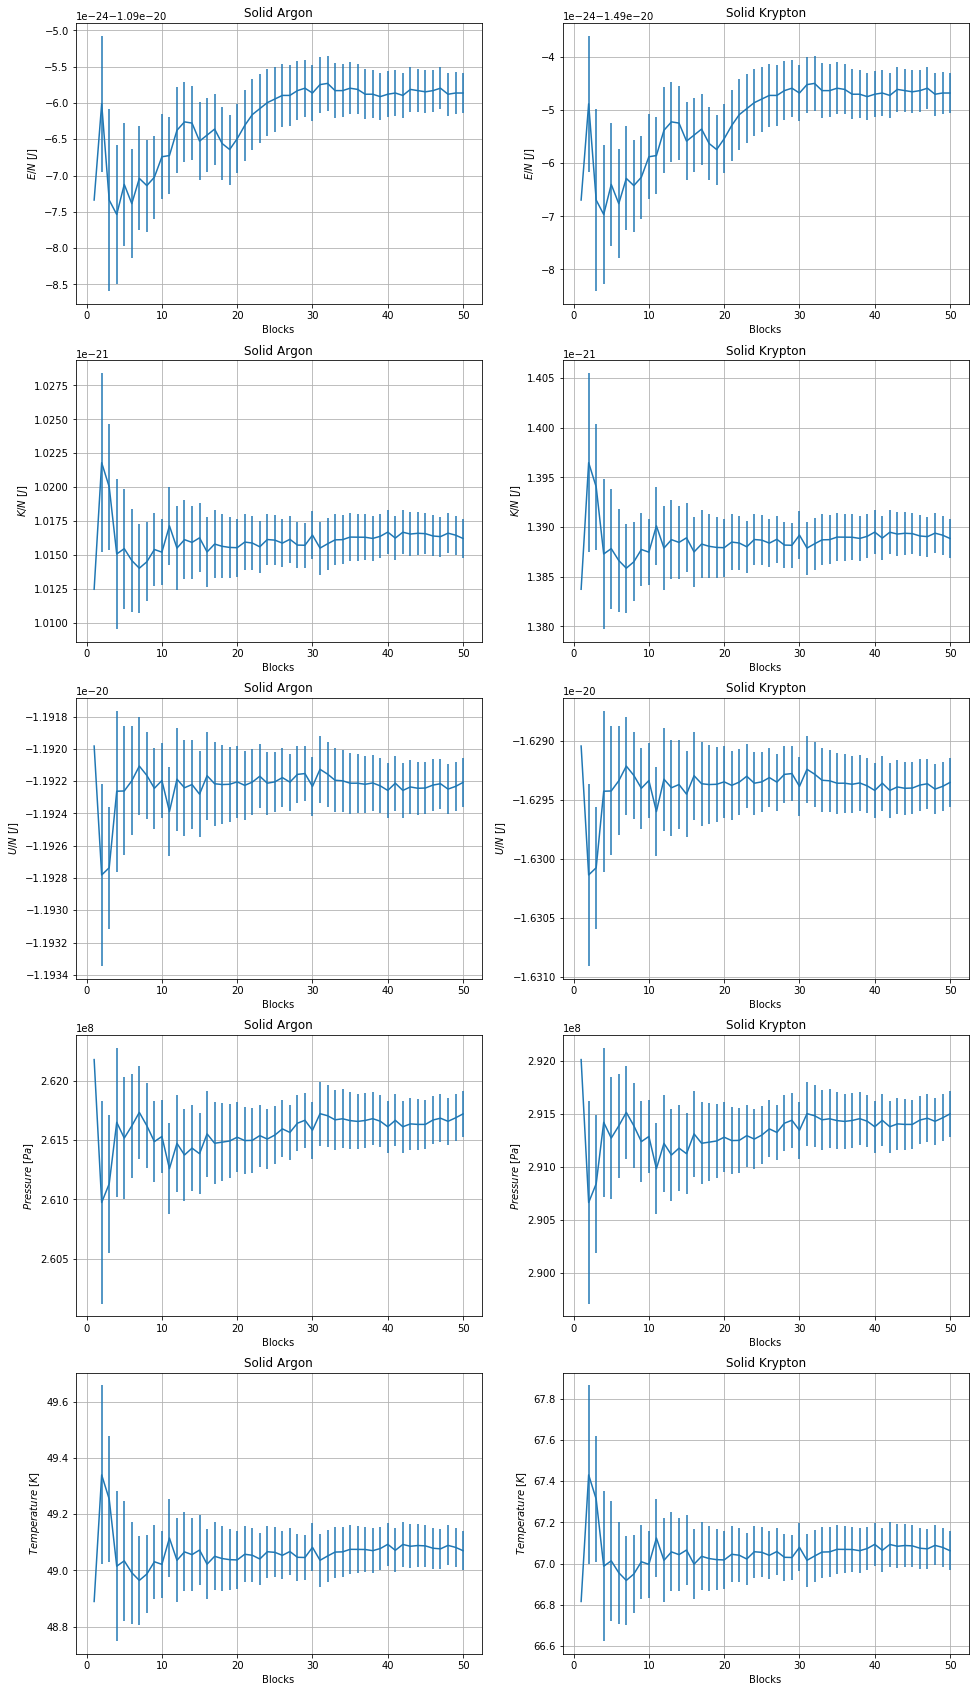

In [4]:
x_s_etot, y_s_etot, yerr_s_etot = np.loadtxt("MolecularDynamics_NVE/solid/ave_etot.out", delimiter = "   ", unpack = True)
x_s_ekin, y_s_ekin, yerr_s_ekin = np.loadtxt("MolecularDynamics_NVE/solid/ave_ekin.out", delimiter = "   ", unpack = True)
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("MolecularDynamics_NVE/solid/ave_epot.out", delimiter = "   ", unpack = True)
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("MolecularDynamics_NVE/solid/ave_pres.out", delimiter = "   ", unpack = True)
x_s_temp, y_s_temp, yerr_s_temp = np.loadtxt("MolecularDynamics_NVE/solid/ave_temp.out", delimiter = "   ", unpack = True)

y_s_etot_ar=y_s_etot*epsilon_ar
y_s_ekin_ar=y_s_ekin*epsilon_ar
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)
y_s_temp_ar=y_s_temp*epsilon_ar/k_b

yerr_s_etot_ar=yerr_s_etot*epsilon_ar
yerr_s_ekin_ar=yerr_s_ekin*epsilon_ar
yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)
yerr_s_temp_ar=yerr_s_temp*epsilon_ar/k_b

y_s_etot_kr=y_s_etot*epsilon_kr
y_s_ekin_kr=y_s_ekin*epsilon_kr
y_s_epot_kr=y_s_epot*epsilon_kr
y_s_pres_kr=y_s_pres*epsilon_kr/(sigma_kr**3)
y_s_temp_kr=y_s_temp*epsilon_kr/k_b

yerr_s_etot_kr=yerr_s_etot*epsilon_kr
yerr_s_ekin_kr=yerr_s_ekin*epsilon_kr
yerr_s_epot_kr=yerr_s_epot*epsilon_kr
yerr_s_pres_kr=yerr_s_pres*epsilon_kr/(sigma_kr**3)
yerr_s_temp_kr=yerr_s_temp*epsilon_kr/k_b

plt.figure(figsize=(2*8,5*6))

plt.subplot(5, 2, 1)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(x_s_etot, y_s_etot_ar, yerr_s_etot_ar)
plt.grid(True)

plt.subplot(5, 2, 3)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(x_s_ekin, y_s_ekin_ar, yerr_s_ekin_ar)
plt.grid(True)

plt.subplot(5, 2, 5)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(5, 2, 7)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(5, 2, 9)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(x_s_temp, y_s_temp_ar, yerr_s_temp_ar)
plt.grid(True)

plt.subplot(5, 2, 2)
plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(x_s_etot, y_s_etot_kr, yerr_s_etot_kr)
plt.grid(True)

plt.subplot(5, 2, 4)
plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(x_s_ekin, y_s_ekin_kr, yerr_s_ekin_kr)
plt.grid(True)

plt.subplot(5, 2, 6)
plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_kr, yerr_s_epot_kr)
plt.grid(True)

plt.subplot(5, 2, 8)
plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_kr, yerr_s_pres_kr)
plt.grid(True)

plt.subplot(5, 2, 10)
plt.title("Solid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(x_s_temp, y_s_temp_kr, yerr_s_temp_kr)
plt.grid(True)

#### Liquid

Simulation parameters used for liquid phase ($\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$) are the same used for solid phase. Results are shown below.

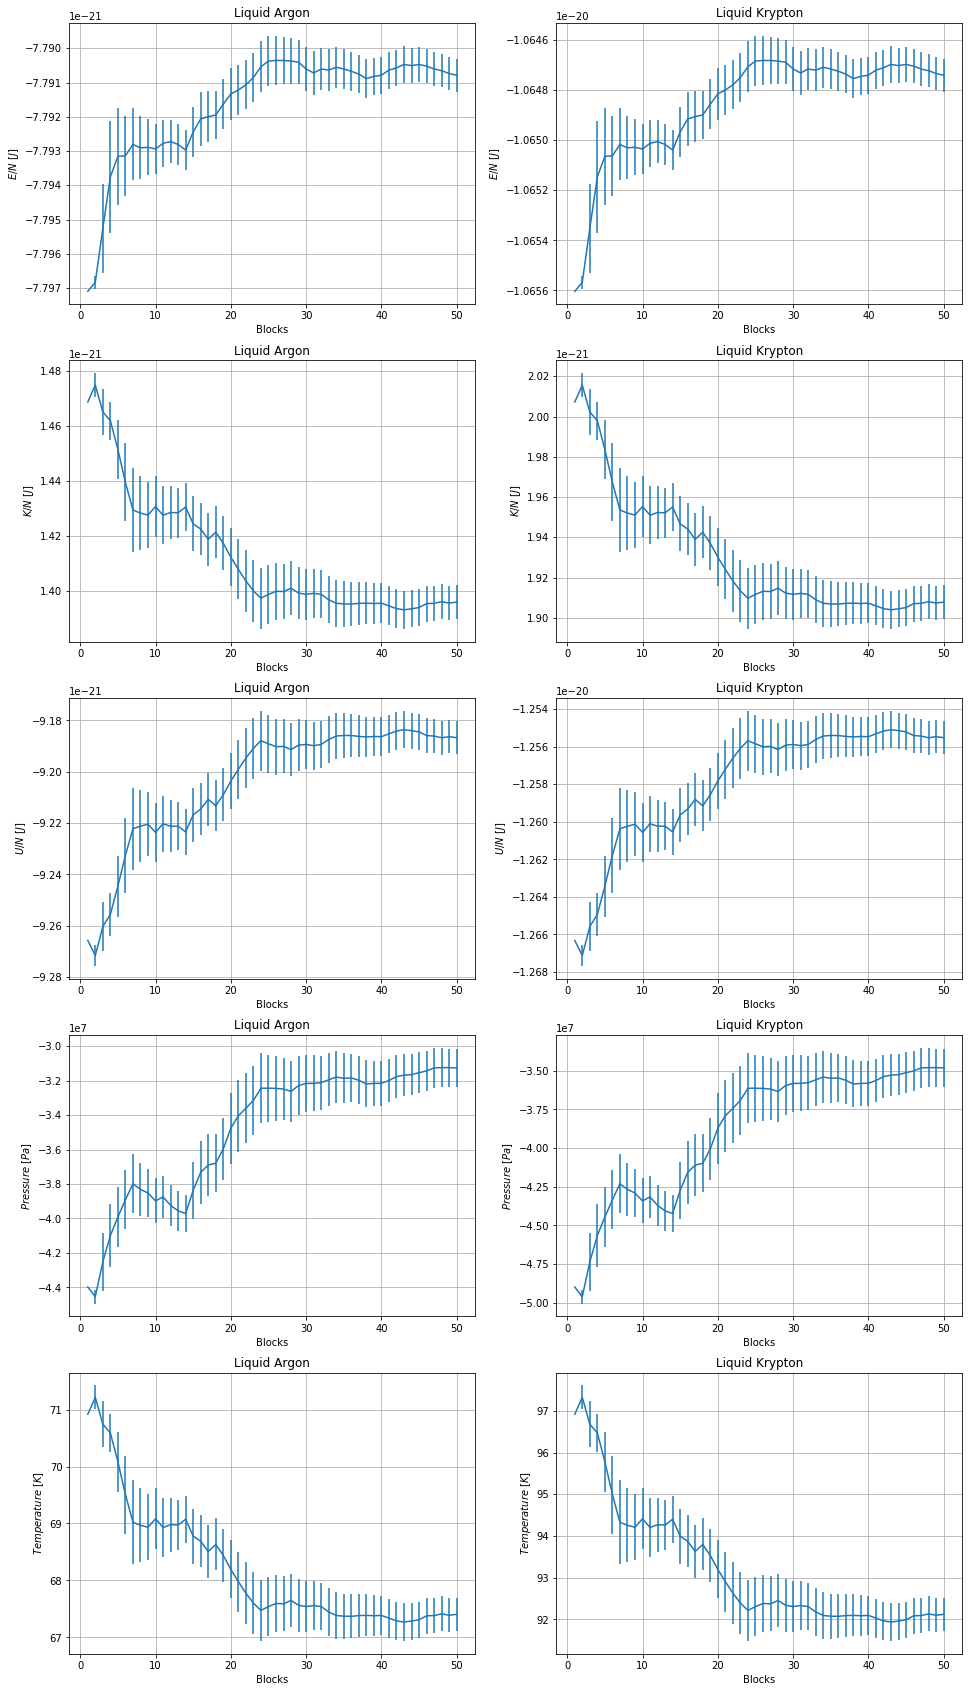

In [5]:
x_l_etot, y_l_etot, yerr_l_etot = np.loadtxt("MolecularDynamics_NVE/liquid/ave_etot.out", delimiter = "   ", unpack = True)
x_l_ekin, y_l_ekin, yerr_l_ekin = np.loadtxt("MolecularDynamics_NVE/liquid/ave_ekin.out", delimiter = "   ", unpack = True)
x_l_epot, y_l_epot, yerr_l_epot = np.loadtxt("MolecularDynamics_NVE/liquid/ave_epot.out", delimiter = "   ", unpack = True)
x_l_pres, y_l_pres, yerr_l_pres = np.loadtxt("MolecularDynamics_NVE/liquid/ave_pres.out", delimiter = "   ", unpack = True)
x_l_temp, y_l_temp, yerr_l_temp = np.loadtxt("MolecularDynamics_NVE/liquid/ave_temp.out", delimiter = "   ", unpack = True)

y_l_etot_ar=y_l_etot*epsilon_ar
y_l_ekin_ar=y_l_ekin*epsilon_ar
y_l_epot_ar=y_l_epot*epsilon_ar
y_l_pres_ar=y_l_pres*epsilon_ar/(sigma_ar**3)
y_l_temp_ar=y_l_temp*epsilon_ar/k_b

yerr_l_etot_ar=yerr_l_etot*epsilon_ar
yerr_l_ekin_ar=yerr_l_ekin*epsilon_ar
yerr_l_epot_ar=yerr_l_epot*epsilon_ar
yerr_l_pres_ar=yerr_l_pres*epsilon_ar/(sigma_ar**3)
yerr_l_temp_ar=yerr_l_temp*epsilon_ar/k_b

y_l_etot_kr=y_l_etot*epsilon_kr
y_l_ekin_kr=y_l_ekin*epsilon_kr
y_l_epot_kr=y_l_epot*epsilon_kr
y_l_pres_kr=y_l_pres*epsilon_kr/(sigma_kr**3)
y_l_temp_kr=y_l_temp*epsilon_kr/k_b

yerr_l_etot_kr=yerr_l_etot*epsilon_kr
yerr_l_ekin_kr=yerr_l_ekin*epsilon_kr
yerr_l_epot_kr=yerr_l_epot*epsilon_kr
yerr_l_pres_kr=yerr_l_pres*epsilon_kr/(sigma_kr**3)
yerr_l_temp_kr=yerr_l_temp*epsilon_kr/k_b

plt.figure(figsize=(2*8,5*6))

plt.subplot(5, 2, 1)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(x_l_etot, y_l_etot_ar, yerr_l_etot_ar)
plt.grid(True)

plt.subplot(5, 2, 3)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(x_l_ekin, y_l_ekin_ar, yerr_l_ekin_ar)
plt.grid(True)

plt.subplot(5, 2, 5)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_l_epot, y_l_epot_ar, yerr_l_epot_ar)
plt.grid(True)

plt.subplot(5, 2, 7)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_l_pres, y_l_pres_ar, yerr_l_pres_ar)
plt.grid(True)

plt.subplot(5, 2, 9)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(x_l_temp, y_l_temp_ar, yerr_l_temp_ar)
plt.grid(True)

plt.subplot(5, 2, 2)
plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(x_l_etot, y_l_etot_kr, yerr_l_etot_kr)
plt.grid(True)

plt.subplot(5, 2, 4)
plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(x_l_ekin, y_l_ekin_kr, yerr_l_ekin_kr)
plt.grid(True)

plt.subplot(5, 2, 6)
plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_l_epot, y_l_epot_kr, yerr_l_epot_kr)
plt.grid(True)

plt.subplot(5, 2, 8)
plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_l_pres, y_l_pres_kr, yerr_l_pres_kr)
plt.grid(True)

plt.subplot(5, 2, 10)
plt.title("Liquid Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(x_l_temp, y_l_temp_kr, yerr_l_temp_kr)
plt.grid(True)

#### Gas

Gas phase ($\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$) presents a longer equilibration transient.
For this reason I chose to use $2000$ equilibration steps.
All other parameters are mantained unchanged.

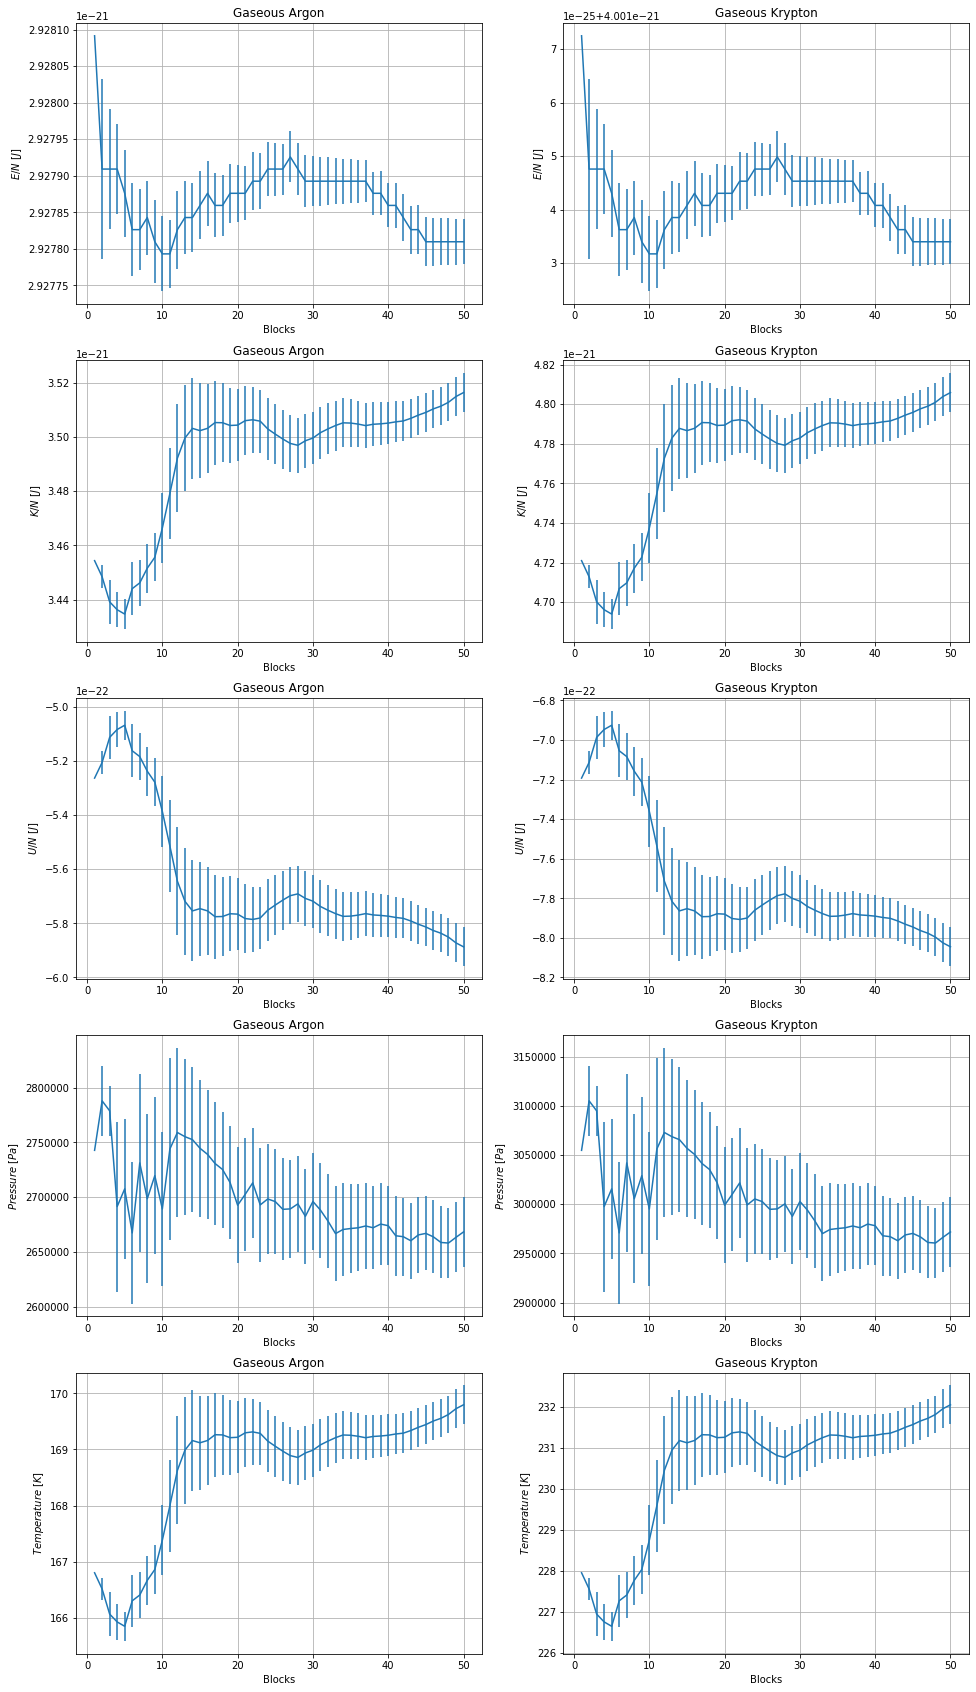

In [6]:
x_g_etot, y_g_etot, yerr_g_etot = np.loadtxt("MolecularDynamics_NVE/gas/ave_etot.out", delimiter = "   ", unpack = True)
x_g_ekin, y_g_ekin, yerr_g_ekin = np.loadtxt("MolecularDynamics_NVE/gas/ave_ekin.out", delimiter = "   ", unpack = True)
x_g_epot, y_g_epot, yerr_g_epot = np.loadtxt("MolecularDynamics_NVE/gas/ave_epot.out", delimiter = "   ", unpack = True)
x_g_pres, y_g_pres, yerr_g_pres = np.loadtxt("MolecularDynamics_NVE/gas/ave_pres.out", delimiter = "   ", unpack = True)
x_g_temp, y_g_temp, yerr_g_temp = np.loadtxt("MolecularDynamics_NVE/gas/ave_temp.out", delimiter = "   ", unpack = True)

y_g_etot_ar=y_g_etot*epsilon_ar
y_g_ekin_ar=y_g_ekin*epsilon_ar
y_g_epot_ar=y_g_epot*epsilon_ar
y_g_pres_ar=y_g_pres*epsilon_ar/(sigma_ar**3)
y_g_temp_ar=y_g_temp*epsilon_ar/k_b

yerr_g_etot_ar=yerr_g_etot*epsilon_ar
yerr_g_ekin_ar=yerr_g_ekin*epsilon_ar
yerr_g_epot_ar=yerr_g_epot*epsilon_ar
yerr_g_pres_ar=yerr_g_pres*epsilon_ar/(sigma_ar**3)
yerr_g_temp_ar=yerr_g_temp*epsilon_ar/k_b

y_g_etot_kr=y_g_etot*epsilon_kr
y_g_ekin_kr=y_g_ekin*epsilon_kr
y_g_epot_kr=y_g_epot*epsilon_kr
y_g_pres_kr=y_g_pres*epsilon_kr/(sigma_kr**3)
y_g_temp_kr=y_g_temp*epsilon_kr/k_b

yerr_g_etot_kr=yerr_g_etot*epsilon_kr
yerr_g_ekin_kr=yerr_g_ekin*epsilon_kr
yerr_g_epot_kr=yerr_g_epot*epsilon_kr
yerr_g_pres_kr=yerr_g_pres*epsilon_kr/(sigma_kr**3)
yerr_g_temp_kr=yerr_g_temp*epsilon_kr/k_b

plt.figure(figsize=(2*8,5*6))

plt.subplot(5, 2, 1)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(x_g_etot, y_g_etot_ar, yerr_g_etot_ar)
plt.grid(True)

plt.subplot(5, 2, 3)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(x_g_ekin, y_g_ekin_ar, yerr_g_ekin_ar)
plt.grid(True)

plt.subplot(5, 2, 5)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_g_epot, y_g_epot_ar, yerr_g_epot_ar)
plt.grid(True)

plt.subplot(5, 2, 7)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_g_pres, y_g_pres_ar, yerr_g_pres_ar)
plt.grid(True)

plt.subplot(5, 2, 9)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(x_g_temp, y_g_temp_ar, yerr_g_temp_ar)
plt.grid(True)

plt.subplot(5, 2, 2)
plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(x_g_etot, y_g_etot_kr, yerr_g_etot_kr)
plt.grid(True)

plt.subplot(5, 2, 4)
plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(x_g_ekin, y_g_ekin_kr, yerr_g_ekin_kr)
plt.grid(True)

plt.subplot(5, 2, 6)
plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_g_epot, y_g_epot_kr, yerr_g_epot_kr)
plt.grid(True)

plt.subplot(5, 2, 8)
plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_g_pres, y_g_pres_kr, yerr_g_pres_kr)
plt.grid(True)

plt.subplot(5, 2, 10)
plt.title("Gaseous Krypton")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(x_g_temp, y_g_temp_kr, yerr_g_temp_kr)
plt.grid(True)